In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 24s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


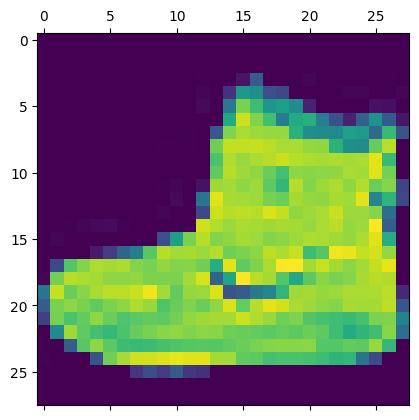

In [11]:
#Data Visualisation
plt.matshow(x_train[0])

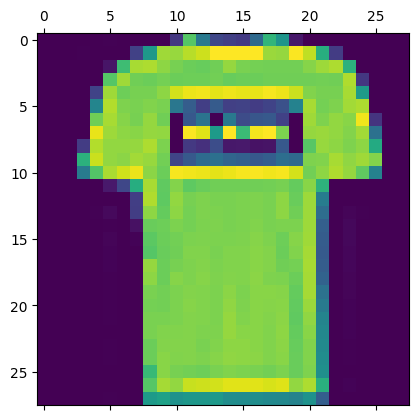

In [12]:
plt.matshow(x_train[1])

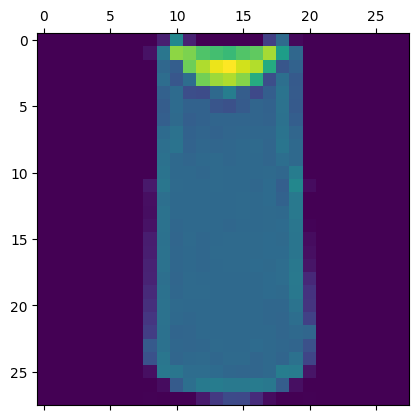

In [13]:
plt.matshow(x_train[2])

In [16]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
y_train[:4]

array([9, 0, 0, 3], dtype=uint8)

In [19]:
classes[y_train[2]]

'T-shirt/top'

In [21]:
#Preprocessing: Scaling the images
print(x_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


In [22]:
print(np.min(x_train[0]))
print(np.max(x_train[0]))

0
255


In [23]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [24]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [26]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes = 10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes = 10)

In [27]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(784, activation = 'relu'),
    keras.layers.Dense(260, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train_categorical, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7908 - loss: 0.5775
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8663 - loss: 0.3609
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8802 - loss: 0.3213
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8901 - loss: 0.2948
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8983 - loss: 0.2680


In [32]:
np.argmax(model.predict(x_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


np.int64(9)

In [33]:
y_test[0]

np.uint8(9)

In [34]:
classes[y_test[0]]

'Ankle boot'

In [35]:
def get_model():
    model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                              keras.layers.Dense(784, activation = 'relu'),
                              keras.layers.Dense(260, activation = 'relu'),
                              keras.layers.Dense(10, activation = 'sigmoid')])

    model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [36]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model()
    model.fit(x_train_scaled, y_train_categorical, epochs = 1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7907 - loss: 0.5801
39.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [37]:
%%timeit -n2 -r2
with tf.device('/CPU:0'):
    model = get_model()
    model.fit(x_train_scaled, y_train_categorical, epochs = 1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7899 - loss: 0.5771
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7902 - loss: 0.5751
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7976 - loss: 0.5746
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7925 - loss: 0.5760
38.3 s ± 178 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [38]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model()
    model.fit(x_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7923 - loss: 0.5716
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8641 - loss: 0.3607
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8827 - loss: 0.3151
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8905 - loss: 0.2969
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8974 - loss: 0.2779
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9028 - loss: 0.2581
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9065 - loss: 0.2486
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9112 - loss: 0.2297
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9152 - loss: 0.2270
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9196 - loss: 0.2124
6min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
